# Cuaderno de trabajo


## Librerías

In [2]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.geometry as sh

## Importar bases de datos geográficas

### Mapas del Perú

<AxesSubplot:>

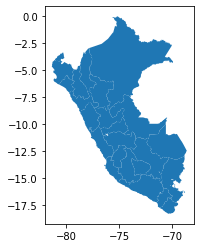

In [3]:
departamentos = gpd.read_file(r'peru/departamentos/DEPARTAMENTOS.shp')
departamentos.plot()

<AxesSubplot:>

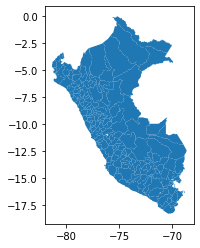

In [4]:
provincias = gpd.read_file(r'peru/provincias/PROVINCIAS.shp')
provincias.plot()

<AxesSubplot:>

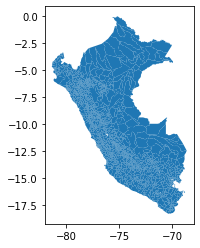

In [5]:
distritos = gpd.read_file(r'peru/distritos/DISTRITOS.shp')
distritos.plot()

In [6]:
distritos.head()

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."


## Reporta residuos

### Importar y transformar la data

In [7]:
# Usamos pandas para importar la data del archivo previamente descargado con el script 'descarga_rr.py'

rr = pd.read_csv('rr.csv')

# Las columnas originales 'LONGITUD' y 'LATITUD' separan decimales con comas (no puntos).
# Debido a eso, se consideran string y no float.
# El siguiente código las transforma:

longitud_original = rr['LONGITUD']
nueva_longitud = []
for i in longitud_original:
    a = i
    b = a.replace(',','.')
    c = float(b)
    nueva_longitud.append(c)
rr['LONGITUD'] = nueva_longitud

latitud_original = rr['LATITUD']
nueva_latitud = []
for i in latitud_original:
    a = i
    b = a.replace(',','.')
    c = float(b)
    nueva_latitud.append(c)
rr['LATITUD'] = nueva_latitud

# Convertimos el dataframe de RR en un dataframe geo espacial con Geopandas:

rr = gpd.GeoDataFrame(rr, geometry=gpd.points_from_xy(rr.LONGITUD, rr.LATITUD))

# Eliminar columnas que no necesitamos

rr = rr.drop(
    [
        'Unnamed: 0',
        'UBIGEO_DPTO', 
        'UBIGEO_PROV', 
        'UBIGEO_DIST', 
        'NOTIF_CORREO_ENV',
        'PTOCRIT_EXISTENTE',
        'PTOCRIT_INEXISTENTE',
        'DIF_DIA',
        'DIF_HORA',
        'ENTIDAD_FISC_AMB',
        'TIPO_EFA',
        'LONGITUD', # Ya no es necesaria, estará en geometry
        'LATITUD' # Ya no es necesaria, estará en geometry
    ], 
    axis=1)

# Un paso adicional es limpiar la data de las columnas de ubigeo

distritos['NOMBPROV'] = distritos['NOMBPROV'].replace(['CAÑETE'], 'CAÑETE')
distritos['NOMBDIST'] = distritos['NOMBDIST'].replace(['SAN VICENTE DE CAÑETE'], 'SAN VICENTE DE CAÑETE')
distritos['NOMBDIST'] = distritos['NOMBDIST'].replace(['BREÑA'], 'BREÑA')
distritos['NOMBDIST'] = distritos['NOMBDIST'].replace(['PARIÑAS'], 'PARIÑAS')

# Visualizamos la información de la nueva tabla. Prestar atención a la columna 'geometry'.

rr.info()
rr

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID_GEN         820 non-null    int64   
 1   OBJECTID       820 non-null    int64   
 2   DEPARTAMENTO   820 non-null    object  
 3   PROVINCIA      820 non-null    object  
 4   DISTRITO       820 non-null    object  
 5   REALIZO_LIMP   190 non-null    object  
 6   PROGRAMO_LIMP  156 non-null    object  
 7   FECHA_TOMA     820 non-null    object  
 8   HORA_FOTO      820 non-null    object  
 9   ESTADO_ALERTA  820 non-null    object  
 10  geometry       820 non-null    geometry
dtypes: geometry(1), int64(2), object(8)
memory usage: 70.6+ KB


,ID_GEN,OBJECTID,DEPARTAMENTO,PROVINCIA,DISTRITO,REALIZO_LIMP,PROGRAMO_LIMP,FECHA_TOMA,HORA_FOTO,ESTADO_ALERTA,geometry
0,1,64370,HUANUCO,HUANUCO,AMARILIS,NaN,NaN,24/08/2021,12:24:18,Alerta no válida,POINT (-76.20664 -9.88763)
1,2,48067,HUANUCO,HUANUCO,AMARILIS,NaN,NaN,17/06/2021,12:05:21,Alerta válida,POINT (-76.25061 -9.94229)
2,3,81352,LIMA,LIMA,ANCON,NaN,NaN,14/11/2021,17:45:08,Alerta pendiente validación,POINT (-77.12162 -11.81851)
3,4,81356,LIMA,LIMA,ANCON,NaN,NaN,14/11/2021,18:44:05,Alerta pendiente validación,POINT (-77.13522 -11.81166)
4,5,50007,LIMA,CAÑETE,ASIA,NaN,NaN,25/06/2021,17:31:31,Alerta no válida,POINT (-76.56815 -12.80125)
...,...,...,...,...,...,...,...,...,...,...,...
815,816,76515,ICA,CHINCHA,GROCIO PRADO,NaN,NaN,15/10/2021,10:57:42,Alerta válida,POINT (-76.15694 -13.41024)
816,817,49953,LORETO,MAYNAS,BELEN,N,S,25/06/2021,10:40:36,Atención programada por Municipalidad,POINT (-73.27260 -3.77657)
817,818,49955,LORETO,MAYNAS,BELEN,N,S,25/06/2021,10:45:34,Atención programada por Municipalidad,POINT (-73.26482 -3.77205)
818,819,59569,CUSCO,CUSCO,SAN SEBASTIAN,NaN,NaN,06/08/2021,11:08:55,Alerta no válida,POINT (-71.93564 -13.48864)


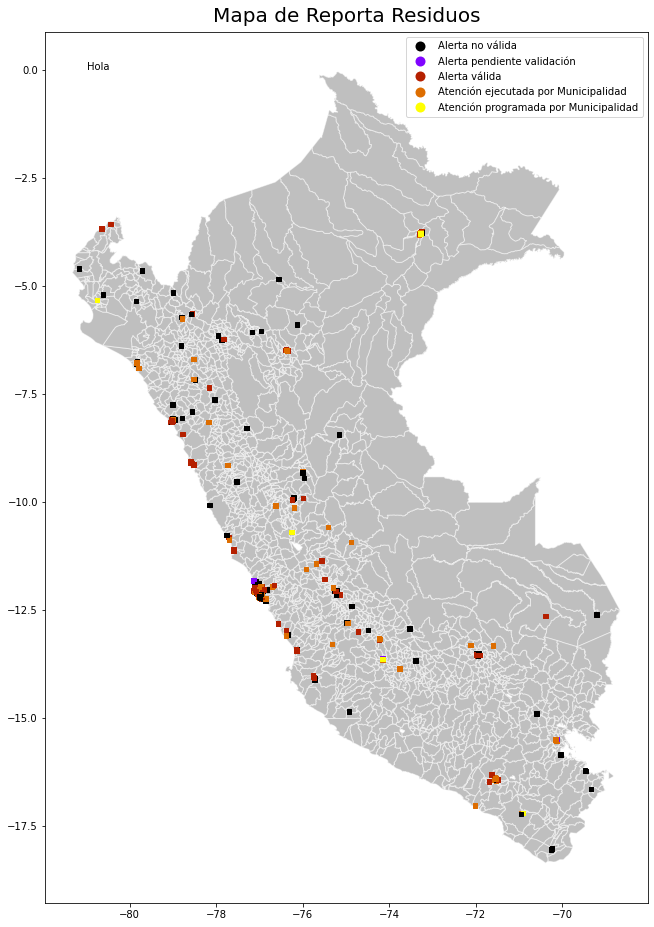

In [8]:
#rr_distritos = distritos.append(rr)
mapa = distritos.plot(
    figsize=(10.80, 19.20), 
    alpha=0.5,
    color='grey',
    edgecolor='white')
mapa.set_title(
    'Mapa de Reporta Residuos', 
    pad = 10,
    fontdict={'fontsize':20, 'color': '#000000'}
    )

alertas = rr.plot(
    ax=mapa, 
    column='ESTADO_ALERTA', 
    markersize=20,
    marker=',',
    legend=True,
    cmap='gnuplot'
    )

texto = plt.text(-81,0, r'Hola')


### Verificar la información

In [9]:
distritos['Ubicación'] = distritos['NOMBDEP'] + ' - ' + distritos['NOMBPROV'] + ' - ' + distritos['NOMBDIST']
a = set(distritos['Ubicación'])
rr['Ubicación'] = rr['DEPARTAMENTO'] + ' - ' + rr['PROVINCIA'] + ' - ' + rr['DISTRITO']
b = set(rr['Ubicación'])

c = list(e for e in a if e in b)
d = list(e for e in b if e not in a)

print(
    '\n Existen ', len(a), 'distritos en el mapa importado. \n', 
    'Las alertas se reportaron en ',len(b), 'de ellos. \n', 
    'Finalmente, las coincidencias son:', len(c),
    '\n Los distritos nombrados en Reporta Residuos que no aparecen en el mapa son: ', len(d)
)



 Existen  1874 distritos en el mapa importado. 
 Las alertas se reportaron en  160 de ellos. 
 Finalmente, las coincidencias son: 160 
 Los distritos nombrados en Reporta Residuos que no aparecen en el mapa son:  0


### Filtrado por distrito

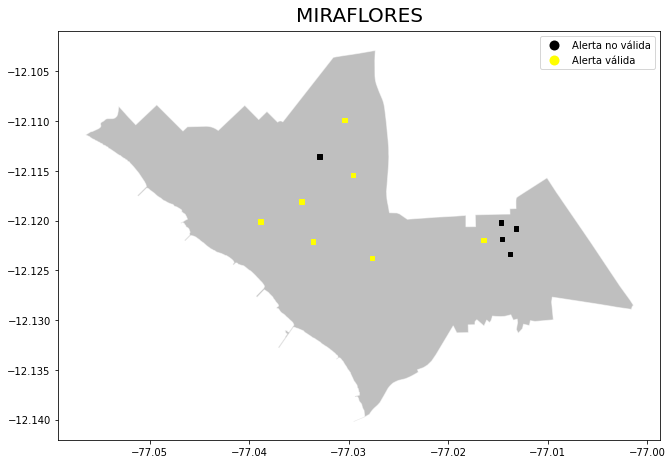

In [11]:
dep = 'LIMA'
pro = 'LIMA'
dis = 'MIRAFLORES'

# Filtrando el mapa

mapa_filtro_dep = distritos['NOMBDEP'] == dep
fdistritos = distritos[mapa_filtro_dep]

mapa_filtro_pro = fdistritos['NOMBPROV'] == pro
fdistritos = fdistritos[mapa_filtro_pro]

mapa_filtro_dis = fdistritos['NOMBDIST'] == dis
fdistritos = fdistritos[mapa_filtro_dis]

# Filtrando las alertas

rr_filtro_dep = rr['DEPARTAMENTO'] == dep
frr = rr[rr_filtro_dep]

rr_filtro_pro = frr['PROVINCIA'] == pro
frr = frr[rr_filtro_pro]

rr_filtro_dis = frr['DISTRITO'] == dis
frr = frr[rr_filtro_dis]

mapa = fdistritos.plot(
    figsize=(10.80, 19.20), 
    alpha=0.5,
    color='grey',
    edgecolor='white')

mapa.set_title(
    dis, 
    pad = 10,
    fontdict={'fontsize':20, 'color': '#000000'}
    )

alertas = frr.plot(
    ax=mapa, 
    column='ESTADO_ALERTA', 
    markersize=20,
    marker=',',
    legend=True,
    cmap='gnuplot'
    )